In [3]:
import csv
import math
from scipy.stats import poisson
from scipy.stats import laplace
from scipy.stats import gennorm
import matplotlib.pyplot as plt

True


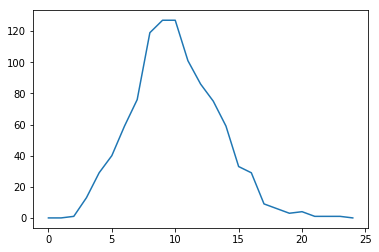

In [12]:
poiss = poisson.rvs(10, size=1000)
norm = gennorm.rvs(.5, size=1000)

def tohisto(data):
    histod = []
    for i in range(math.ceil(max(data))):
        histod.append(0)
        for x in data:
            if i == x:
                histod[i] = histod[i] + 1
    return histod

def is_int(num):
    return str(num).replace('.','') == str(num)

plt.plot(tohisto(poiss))

In [ ]:
def make_csv(columns):
    # Assumption all column lengths are identical
    